<a href="https://colab.research.google.com/github/NightMachinary/soal_playground/blob/master/Optimizer22_poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bootstrap

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.colors

import numpy 
np = numpy

from scipy.spatial.transform import Rotation 

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 13,13

In [ ]:
from matplotlib import cm

def set_axes_equal(ax, zoom_out=0.1):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call a fraction of the max range the plot radius.
    plot_radius = zoom_out * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# scatterplot

 - https://matplotlib.org/stable/api/markers_api.html

In [ ]:
from mpl_toolkits.mplot3d import axes3d

##
def manifold1(ax):
  X, Y, Z = axes3d.get_test_data(delta=0.1) #: higher delta means more distance between points

  ax.scatter(X, Y, Z, marker='+', color='#3258a8')


def sphere(ax, num_mult=3):
  U, V = np.mgrid[0:2*np.pi:(num_mult * 20j), 0:np.pi:(num_mult * 10j)]
  scale = 13
  X = (scale * np.cos(U) * np.sin(V)) + 20
  Y = (scale * np.sin(U) * np.sin(V)) + 0
  Z = scale * np.cos(V)

  ax.scatter(X, Y, Z, marker='o', color='#f03cd2')
  # ax.auto_scale_xyz(X, Y, Z, had_data=False) #: This somehow makes the aspect ratio 1:1.


def plane(ax):
  N_POINTS = 1000
  TARGET_X_SLOPE = 2
  TARGET_y_SLOPE = -1
  TARGET_OFFSET  = 20
  EXTENTS = 20
  NOISE = 1

  xs = [np.random.uniform(2*EXTENTS)-EXTENTS-10 for i in range(N_POINTS)]
  ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
  zs = []
  for i in range(N_POINTS):
      zs.append(xs[i]*TARGET_X_SLOPE + \
                ys[i]*TARGET_y_SLOPE + \
                TARGET_OFFSET + np.random.normal(scale=NOISE))
      
  ax.scatter(xs, ys, zs, marker='1', color='green')


def sinusoidal(ax):
  scale = 7
  X = scale * np.arange(-5, 5, 0.15)
  Y = scale * np.arange(-5, 5, 0.15)
  X, Y = np.meshgrid(X, Y)
  #: Mesh grids are like a 2D function: `f(a, b) = ans`.
  #: X(x_count, y_count) = x_coord
  #: Y(x_count, y_count) = y_coord

  # print(Y)

  R = np.sqrt(X**2 + Y**2)
  Z = np.sin(R)
  #: Z(x_count, y_count) = z_coord

  # print(Z.shape)

  #: Converting meshgrid-style arrays to a list of vectors
  vectors = np.zeros((X.shape[0]*X.shape[1], 3))
  c = 0
  for i in np.arange(X.shape[0]):
    for j in np.arange(X.shape[1]):

      x = X[i][j]
      y = Y[i][j]
      z = Z[i][j]

      vectors[c] = [x, y, z]

      c += 1

  rot = Rotation.from_euler('zyx', [0, 30, 0], degrees=True)
  rotated = rot.apply(vectors)
  # print(rotated)
  X = rotated[:, 0]
  Y = rotated[:, 1]
  Z = rotated[:, 2]

  ax.scatter(X, Y, Z, marker='2', color='orange')


def plot_me(fn_list, zoom_out=0.1, fname=None):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d') 
  #: =aspect='equal'= not supported currently for 3D plot

  for fn in fn_list:
    fn(ax)

  # ax.set_box_aspect((1,1,1))
  set_axes_equal(ax, zoom_out=zoom_out)

  plt.axis('off')

  if fname is None:
    plt.show()
  else:
    plt.savefig(fname, transparent=True)
    files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

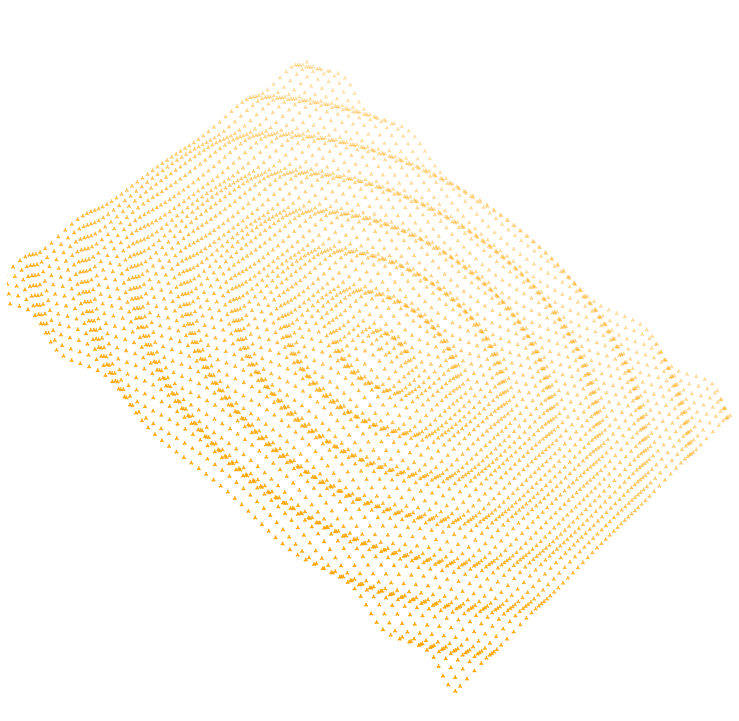

In [ ]:
plot_me([sinusoidal], zoom_out=0.3, fname='sinusoidal_zo0.3.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

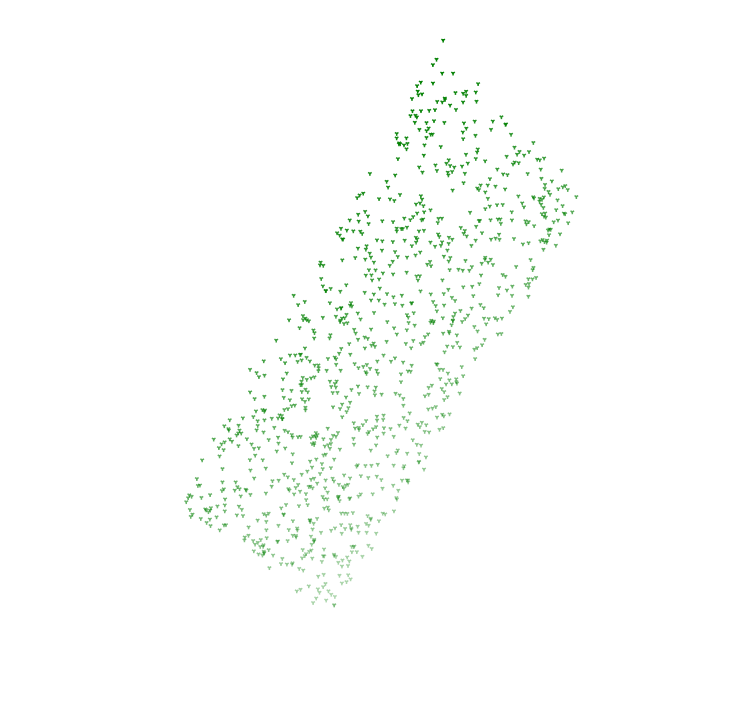

In [ ]:
plot_me([plane], zoom_out=0.2, fname='plane_zo0.2.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

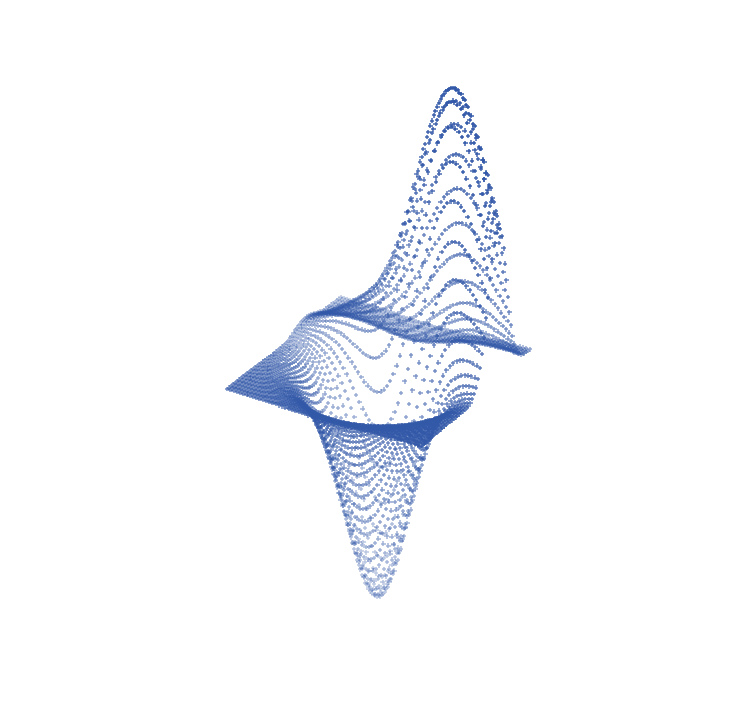

In [ ]:
plot_me([manifold1], zoom_out=0.3, fname='manifold1_zo0.3.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

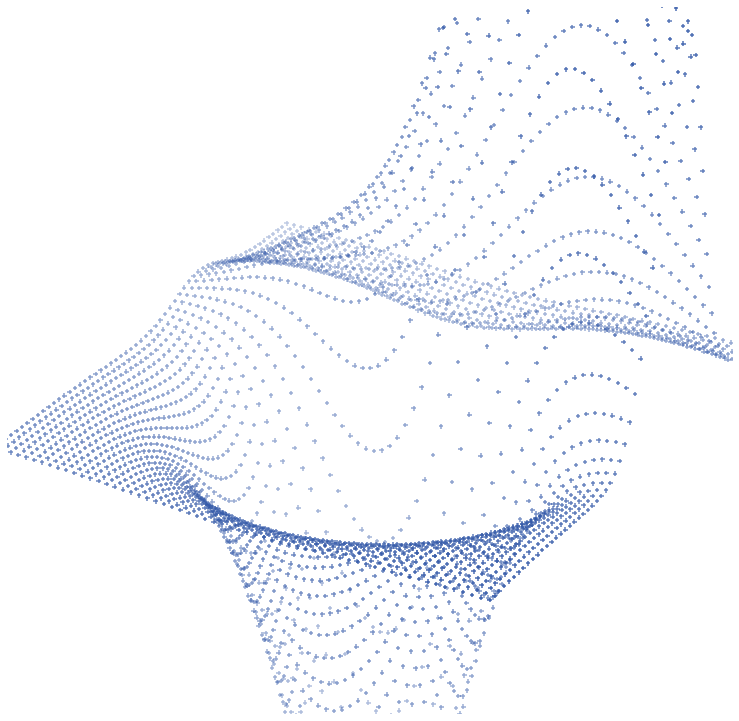

In [ ]:
plot_me([manifold1], zoom_out=0.12, fname='manifold1_zo0.12.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

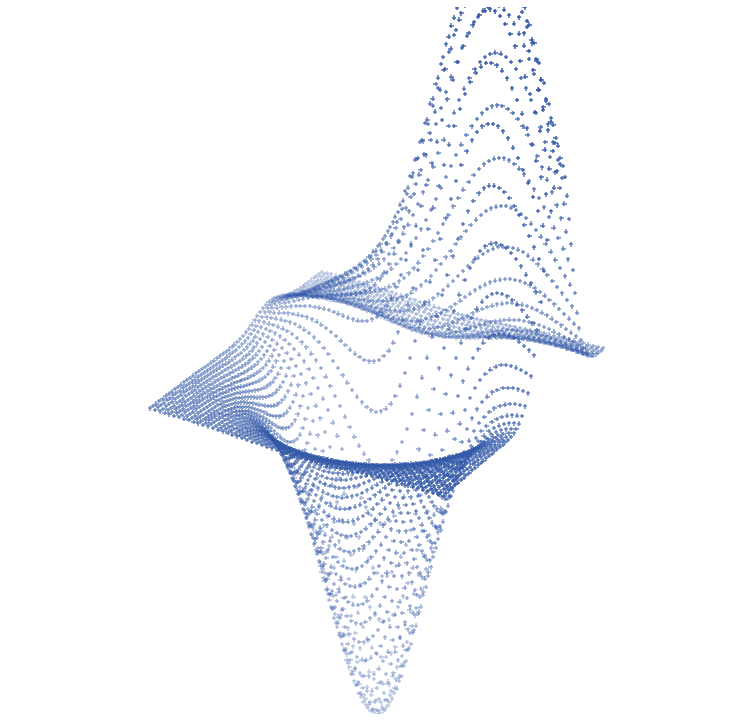

In [ ]:
plot_me([manifold1], zoom_out=0.2, fname='manifold1_zo0.2.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

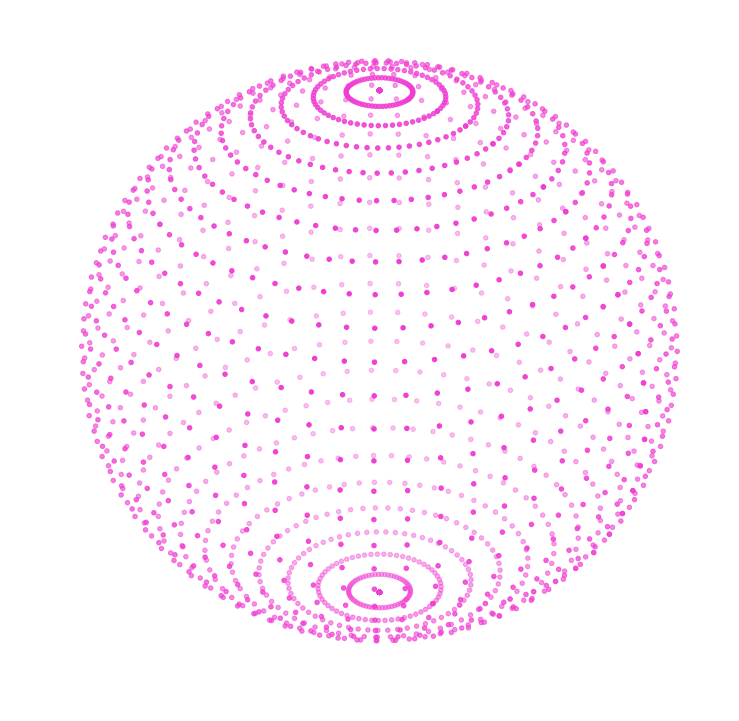

In [ ]:
plot_me([sphere], zoom_out=0.3, fname='sphere_zo0.3.svg')

# Voxels

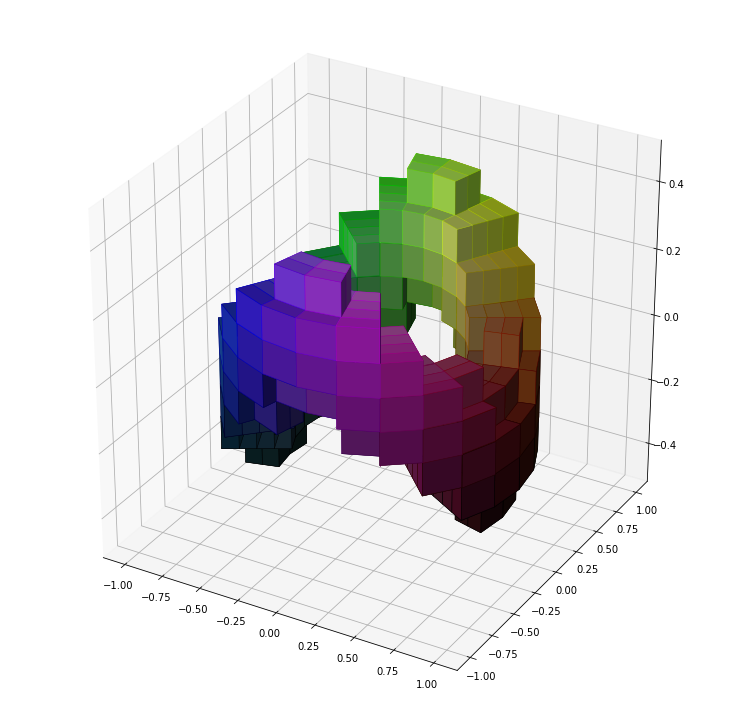

In [ ]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, theta, z = np.mgrid[0:1:11j, 0:np.pi*2:25j, -0.5:0.5:11j]
x = r*np.cos(theta)
y = r*np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*2))**2 < 0.2**2

# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi*2)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.5
colors = matplotlib.colors.hsv_to_rgb(hsv)

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

plt.show()